In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-2])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items

C:\Users\Martin\Projects\OSRS_Research
['C:\\Users\\Martin\\Projects\\OSRS_Research\\ML\\OSRS', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\python37.zip', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\DLLs', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\lib', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37', '', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\lib\\site-packages', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Martin\\.ipython', 'C:\\Users\\Martin\\Projects\\OSRS_Research', 'C:\\Users\\Martin\\Projects\\OSRS_Research']


In [76]:
import keras
from keras.layers import InputLayer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [57]:
item = "Abyssal_whip"

In [58]:
similar = items.getSimilarItems(item)
print(similar)
similar = [a[0] for a in similar]
similar = similar[:]
print(similar)

[('Abyssal_dagger_(p+)', 14), ('Abyssal_bludgeon', 13), ('Abyssal_dagger', 14), ('Abyssal_dagger_(p++)', 14), ('Abyssal_dagger_(p)', 14)]
['Abyssal_dagger_(p+)', 'Abyssal_bludgeon', 'Abyssal_dagger', 'Abyssal_dagger_(p++)', 'Abyssal_dagger_(p)']


In [59]:
items.getPrices(item)[-10:]

[2663958,
 2643140,
 2626840,
 2614224,
 2606262,
 2593007,
 2593049,
 2587581,
 2581066,
 2581709]

In [60]:
items.getInfo(item)

{'members': 'True',
 'edible': 'False',
 'update': '/w/Update:Slayer_Skill',
 'quest': 'No',
 'destroy': 'Drop',
 'image': '/w/File:Abyssal_whip.png',
 'lowAlch': '48000',
 'examine': 'A weapon from the abyss.',
 'highAlch': '72000',
 'storeprice': 'N/A',
 'seller': 'N/A',
 'equipable': 'True',
 'weight': '0.453',
 'released': '26 January 2005',
 'storeCurrency': 'N/A',
 'name': 'Abyssal_whip',
 'alchable': 'True',
 'exchangePrice': '2622266',
 'tradeable': 'True',
 'buyLimit': '70',
 'noteable': 'True',
 'stackable': 'False'}

1289 1295 1289 1282 0


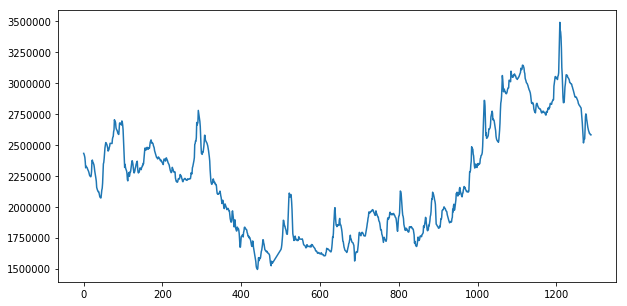

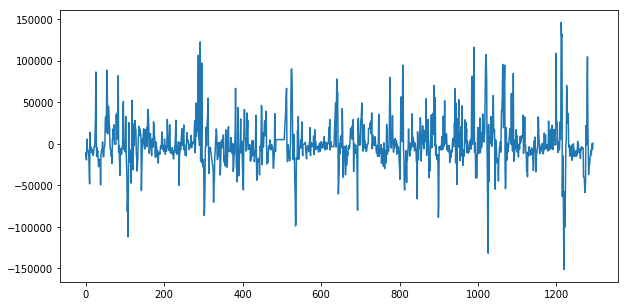

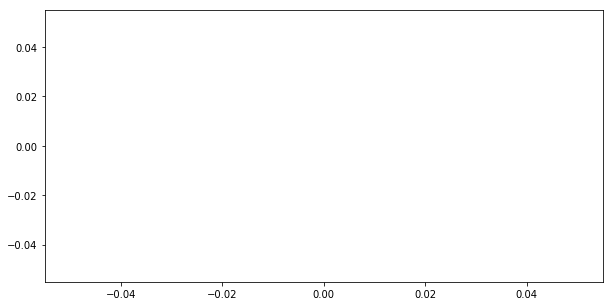

In [82]:
ma = 21
prices = items.getPrices(item)
changes = items.getPriceChanges(item)
quant = items.getQuants(item)
print(len(movAvg),len(prices),len(movAvg),len(expAvg),len(quant))
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(prices[-1*len(movAvg):],label='Price')
plt.show()
plt.plot(changes)
plt.show()
plt.plot(quant)
plt.show()

1284 1284


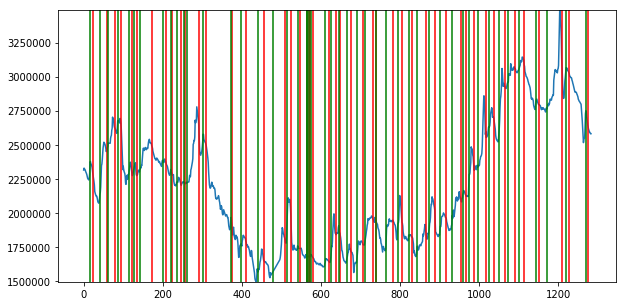

In [135]:
ma12 = items.sma(prices,12)
ma3 = items.sma(prices,3)[-1*len(ma12):]
print(len(ma3),len(ma12))

smaSell = []
smaBuy = []
for i in range(1,len(ma12)):
    if ma3[i-1]>ma12[i-1] and ma3[i]<ma12[i]:
        smaSell.append(i)
    if ma3[i-1]<ma12[i-1] and ma3[i]>ma12[i]:
        smaBuy.append(i)
        
smaSignals = [0]*len(D)
for a in smaSell:
    smaSignals[a] = -1
for a in smaBuy:
    smaSignals[a] = 1
        
plt.plot(prices[-1*len(ma12):])
top = max(prices)+1
for c in smaSell:
    plt.plot([c,c],[0,top],'r')
for c in smaBuy:
    plt.plot([c,c],[0,top],'g')
#plt.xlim(1100,1300)
plt.ylim(min(prices),top)
plt.show()

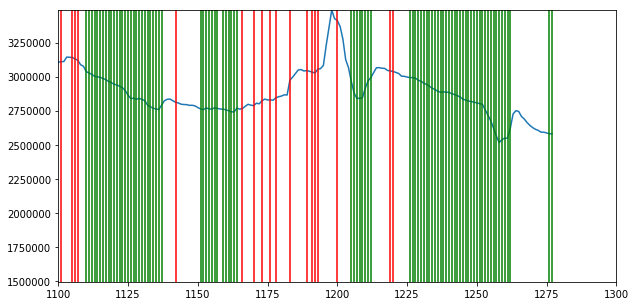

In [136]:
kSlow, D = items.stochOscil(prices)
kSlow = kFast[-1*len(D):]
    
stochSell = []
stochBuy = []
for i in range(1,len(D)):
    if kSlow[i]<20:
        stochBuy.append(i)
    elif kSlow[i]<80 and D[i]<80 and kSlow[i-1]<D[i-1] and kSlow[i]>D[i]:
        stochBuy.append(i)
    if kSlow[i-1]>kSlow[i] and kSlow[i-1]>90:
        stochSell.append(i)
        
stochSignals = [0]*len(D)
for a in momSell:
    stochSignals[a] = -1
for a in momBuy:
    stochSignals[a] = 1
        
plt.plot(prices[-1*len(D):])
top = max(prices)+1
for c in stochSell:
    plt.plot([c,c],[0,top],'r')
for c in stochBuy:
    plt.plot([c,c],[0,top],'g')
plt.xlim(1100,1300)
plt.ylim(min(prices),top)
plt.show()

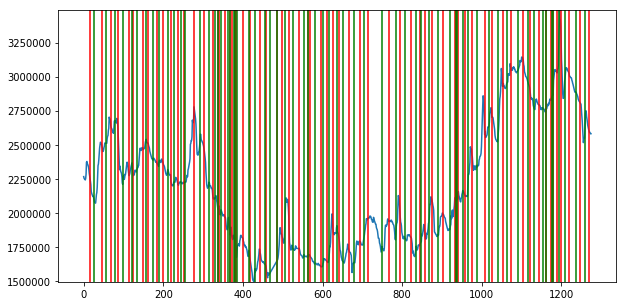

In [137]:
mom, momMA = items.momentum(prices)
mom = mom[-1*len(momMA):]

momSell = []
momBuy = []
for i in range(1,len(momMA)):
    if mom[i-1]>momMA[i-1] and mom[i]<momMA[i]:
        momSell.append(i)
    if mom[i-1]<momMA[i-1] and mom[i]>momMA[i]:
        momBuy.append(i)

momSignals = [0]*len(momMA)
for a in momSell:
    momSignals[a] = -1
for a in momBuy:
    momSignals[a] = 1
        
plt.plot(prices[-1*len(momMA):])
top = max(prices)+1
for c in momSell:
    plt.plot([c,c],[0,top],'r')
for c in momBuy:
    plt.plot([c,c],[0,top],'g')
#plt.xlim(1100,1300)
plt.ylim(min(prices),top)
plt.show()

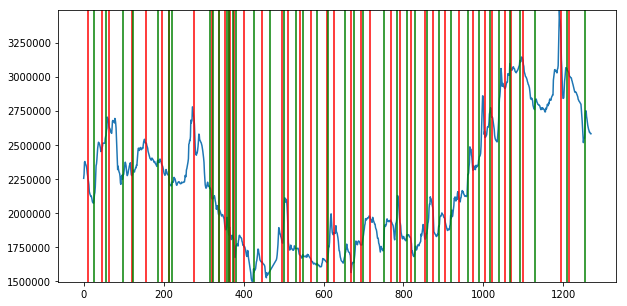

In [138]:
ema9, macd = items.macd(prices)
ema9 = ema9[-1*len(macd):]

macdSell = []
macdBuy = []
for i in range(1,len(macd)):
    if ema9[i-1]>macd[i-1] and ema9[i]<macd[i]:
        macdSell.append(i)
    if ema9[i-1]<macd[i-1] and ema9[i]>macd[i]:
        macdBuy.append(i)
        
macdSignals = [0]*len(macd)
for a in macdSell:
    macdSignals[a] = -1
for a in macdBuy:
    macdSignals[a] = 1
        
plt.plot(prices[-1*len(macd):])
top = max(prices)+1
for c in macdSell:
    plt.plot([c,c],[0,top],'r')
for c in macdBuy:
    plt.plot([c,c],[0,top],'g')
#plt.xlim(1100,1300)
plt.ylim(min(prices),top)
plt.show()

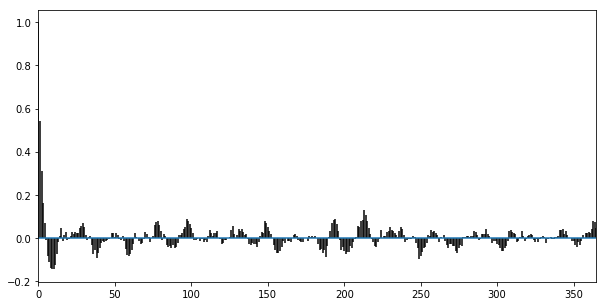

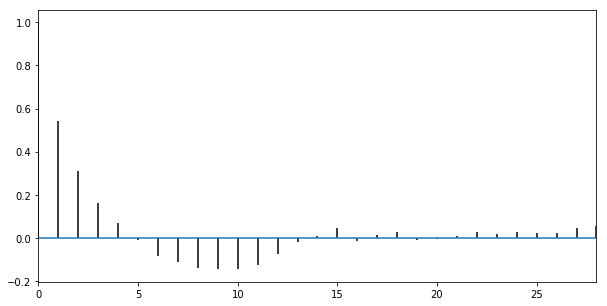

In [139]:
plt.acorr(changes,maxlags=365)
plt.xlim(0,365)
plt.show()
plt.acorr(changes,maxlags=28)
plt.xlim(0,28)
plt.show()

In [140]:
def classify(d):
    if d>=0:
        return 1
    if d<0:
        return 0

In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))

features = [momSignals,smaSignals,stochSignals,macdSignals]
for i in range(len(features)):
    features[i] = list(scaler.fit_transform(np.array(features[i]).reshape(-1, 1)).reshape(len(features[i]),))

fsizes = [1,1,1,1]
x = []
y = []
p = []
size = sum(fsizes)

fsMax = max(fsizes)

fMin = len(features[0])
for f in features:
    if len(f)<fMin:
        fMin=len(f)
        
for i in range(-1*fMin+fsMax,0,1):
    xelem = []
    for j in range(len(features)):
        xelem = xelem + features[j][i-fsizes[j]:i]
    x.append(xelem)
    y.append(classify(changes[i]))
    p.append(prices[i])
print(x[0],x[-1])
print(len(x[0]),len(x[-1]))
print(y[0],y[-1])
#y = keras.utils.to_categorical(y, num_classes=2)

[0.0, 0.0, 0.0, 0.0] [0.0, -1.0, 0.0, 0.0]
4 4
1 1


c:\users\martin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\martin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\martin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\martin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


1015 1015 127 127 127 127 127
4 [0. 0. 0. 0.]
1
4 [0. 0. 0. 0.]
0


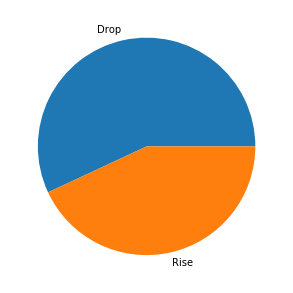

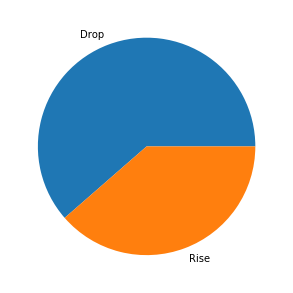

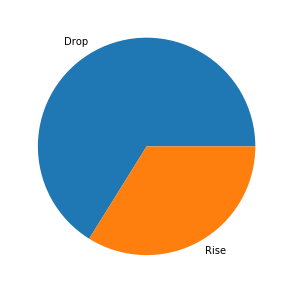

In [153]:
#scaler.fit_transform(np.array(changes).reshape(-1, 1)).reshape(len(changes),)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

s1 = int(len(y)*.8)
s2  =int(len(y)*.9)

x_train = np.array(x[:s1])
y_train = np.array(y[:s1])

x_val = np.array(x[s1:s2])
y_val = np.array(y[s1:s2])
p_val = np.array(p[s1:s2])

x_test = np.array(x[s2:])
y_test = np.array(y[s2:])
p_test = np.array(p[s2:])

print(len(x_train),len(y_train),len(x_val),len(y_val),len(x_test),len(y_test),len(p_test))
print(len(x_train[0]),x_train[0])
print(y_train[0])
print(len(x_test[0]),x_test[0])
print(y_test[0])
plt.pie([list(y_train).count(0)/len(y_train),list(y_train).count(1)/len(y_train)],labels=['Drop','Rise'])
plt.show()
plt.pie([list(y_val).count(0)/len(y_val),list(y_val).count(1)/len(y_val)],labels=['Drop','Rise'])
plt.show()
plt.pie([list(y_test).count(0)/len(y_test),list(y_test).count(1)/len(y_test)],labels=['Drop','Rise'])
plt.show()

In [154]:
model = Sequential()
model.add(Dense(int(size), input_dim=size, activation='sigmoid'))
#model.add(Dense(int(size*2), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 5         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
None


In [155]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
            validation_data=(x_val,y_val),
            epochs=50,
            batch_size=16)

Train on 1015 samples, validate on 127 samples
Epoch 1/50
1015/1015 [==============================] - 1s 758us/step - loss: 0.7264 - acc: 0.5695 - val_loss: 0.6809 - val_acc: 0.6142
Epoch 2/50
1015/1015 [==============================] - 0s 79us/step - loss: 0.7078 - acc: 0.5695 - val_loss: 0.6723 - val_acc: 0.6142
Epoch 3/50
1015/1015 [==============================] - 0s 67us/step - loss: 0.6967 - acc: 0.5695 - val_loss: 0.6686 - val_acc: 0.6142
Epoch 4/50
1015/1015 [==============================] - 0s 66us/step - loss: 0.6902 - acc: 0.5695 - val_loss: 0.6675 - val_acc: 0.6142
Epoch 5/50
1015/1015 [==============================] - 0s 68us/step - loss: 0.6866 - acc: 0.5695 - val_loss: 0.6675 - val_acc: 0.6142
Epoch 6/50
1015/1015 [==============================] - 0s 69us/step - loss: 0.6843 - acc: 0.5695 - val_loss: 0.6682 - val_acc: 0.6142
Epoch 7/50
1015/1015 [==============================] - 0s 68us/step - loss: 0.6832 - acc: 0.5695 - val_loss: 0.6687 - val_acc: 0.6142
Epoch 8

In [156]:
score = model.evaluate(x_test, y_test, batch_size=1)
print(model.metrics_names)
print(score)

y_pred = model.predict(x_test)
true_pos = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]>.5 and y_test[i]>.5])
false_pos = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]>.5 and y_test[i]<.5])
true_neg = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]<.5 and y_test[i]<.5])
false_neg = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]<.5 and y_test[i]>.5])
print(true_pos,false_pos,true_neg,false_neg,true_pos+true_neg+false_pos+false_neg)
print('Accuracy: ', (true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg))
prec = (true_pos)/(true_pos+false_pos)
print('Precision: ', prec)
recall = (true_pos)/(true_pos+false_neg)
print('Recall: ', recall)
print('F1: ', (2*recall*prec)/(recall+prec))

127/127 [==============================] - 0s 409us/step
['loss', 'acc']
[0.6453264705308779, 0.6771653543307087]
6 4 80 37 127
Accuracy:  0.6771653543307087
Precision:  0.6
Recall:  0.13953488372093023
F1:  0.22641509433962265


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


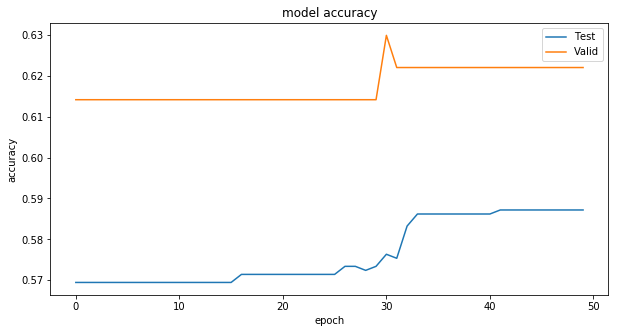

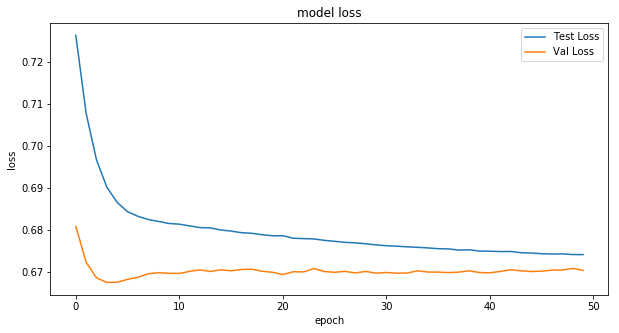

In [157]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'],label='Test')
plt.plot(history.history['val_acc'],label='Valid')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],label='Test Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [158]:
print(y_test[:20])
print(p_test[:20])

[0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0]
[2763736. 2758338. 2771326. 2764498. 2761845. 2772558. 2768070. 2763217.
 2762349. 2757740. 2750535. 2741848. 2742200. 2769668. 2762109. 2766696.
 2782923. 2797769. 2791486. 2787789.]


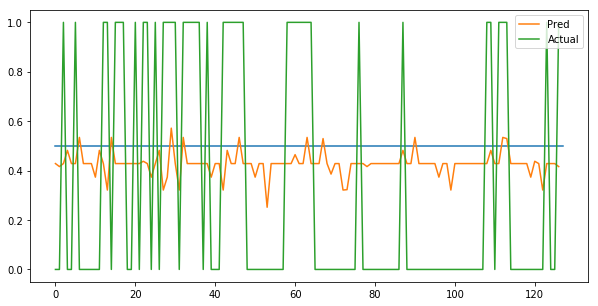

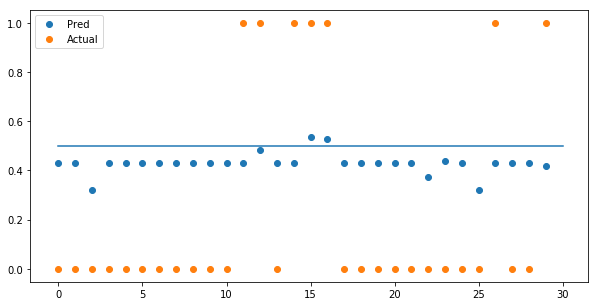

In [159]:
y_pred = model.predict(x_test)
plt.plot([0, len(y_pred)], [.5, .5])
plt.plot(y_pred,label='Pred')
plt.plot(y_test,label='Actual')
plt.legend()
plt.show()
plt.plot([0, len(y_test[-30:])], [.5, .5])
plt.scatter(range(len(y_test[-30:])),y_pred[-30:],label='Pred')
plt.scatter(range(len(y_test[-30:])),y_test[-30:],label='Actual')
#plt.plot(y_test[-31:],label='Actual-1')
plt.legend()
plt.show()

In [160]:
import util.trading_systems as ts

bl = int(items.getInfo(item)['buyLimit'])
print(len(x_test),len(y_test),len(p_test))
budgets = [10**5,10**6,10**7,10**8,10**9]
mpBest = [([-100],-1)] * len(budgets)
mpBestNoT = [[-100]] * len(budgets)
ppBest = [[-100]] * len(budgets)
bhBest = [[-100]] * len(budgets)
perBest = [[-100]] * len(budgets)

yp = model.predict(x_val)
for b in range(len(budgets)):
    t = 0
    for i in range(10):
        mp = ts.modelProfit(t,yp,p_val,bl,budgets[b])
        if mp[-1]>mpBest[b][0][-1] and mp[-1]!=0.0:
            mpBest[b] = (mp,t)
        t += .02

yp = model.predict(x_test)
for b in range(len(budgets)):
    print(budgets[b])
    t = 0
    bhBest[b] = ts.buyAndHold(p_test,bl,budgets[b])
    ppBest[b] = ts.perfectProfit(p_test,bl,budgets[b])
    perBest[b] = ts.persistanceProfit(p_test,bl,budgets[b])
    mpBest[b] = (ts.modelProfit(mpBest[b][1],yp,p_test,bl,budgets[b]),mpBest[b][1])
    mpBestNoT[b] = ts.modelProfit(0,yp,p_test,bl,budgets[b])

127 127 127
100000
1000000
10000000
100000000
1000000000


In [161]:
for b in range(len(budgets)):
    print(budgets[b])
    print('\tModel\n\t',mpBest[b][0][-1],mpBest[b][1])
    print('\tModel No T\n\t',mpBestNoT[b][-1],0)
    print('\tPersistance\n\t',perBest[b][-1])
    print('\tPerfect\n\t',ppBest[b][-1])
    print('\tBuy and Hold\n\t',bhBest[b][-1])

100000
	Model
	 0.0 -1
	Model No T
	 0.0 0
	Persistance
	 0.0
	Perfect
	 0.0
	Buy and Hold
	 0.0
1000000
	Model
	 0.0 -1
	Model No T
	 0.0 0
	Persistance
	 0.0
	Perfect
	 0.0
	Buy and Hold
	 0.0
10000000
	Model
	 0.0516675 0
	Model No T
	 0.0516675 0
	Persistance
	 0.2818701
	Perfect
	 0.4585685
	Buy and Hold
	 -0.0546081
100000000
	Model
	 0.05368608 0
	Model No T
	 0.05368608 0
	Persistance
	 0.3133274
	Perfect
	 0.54136135
	Buy and Hold
	 -0.06552972
1000000000
	Model
	 0.01169903 0
	Model No T
	 0.01169903 0
	Persistance
	 0.153020908
	Perfect
	 0.267352607
	Buy and Hold
	 -0.01274189


127 126 126 127


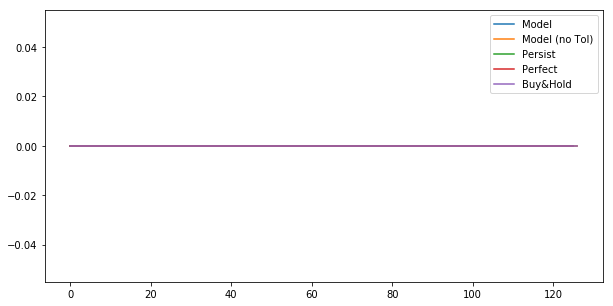

127 126 126 127


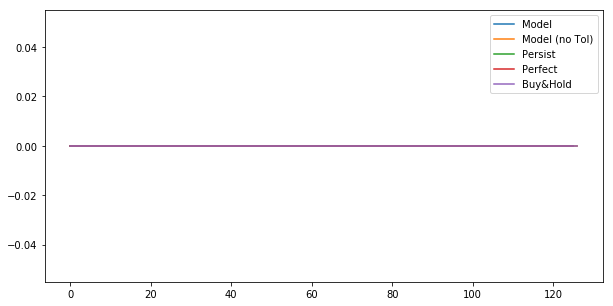

127 126 126 127


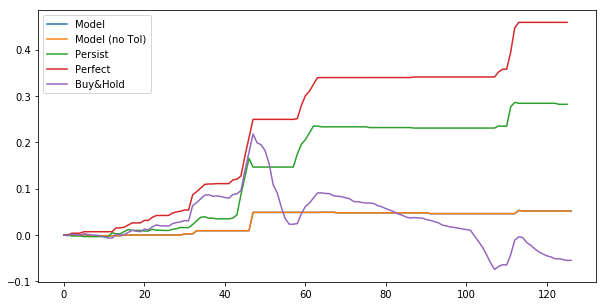

127 126 126 127


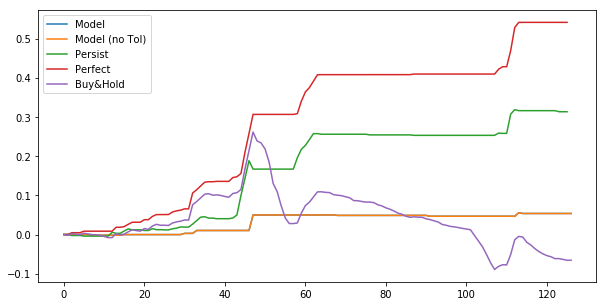

127 126 126 127


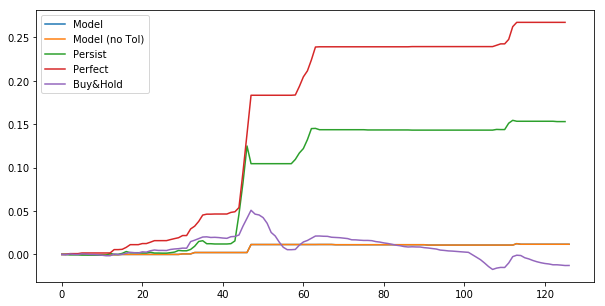

In [162]:
for b in range(len(budgets)):
    print(len(mpBest[b][0]),len(perBest[b]),len(ppBest[b]),len(bhBest[b]))
    plt.plot(mpBest[b][0],label='Model')
    plt.plot(mpBestNoT[b],label='Model (no Tol)')
    plt.plot(perBest[b],label='Persist')
    plt.plot(ppBest[b],label='Perfect')
    plt.plot(bhBest[b],label='Buy&Hold')
    plt.legend()
    plt.show()